In [25]:
import sys
sys.executable

'C:\\Users\\SEAN\\anaconda3\\envs\\Carbon_Cloud\\python.exe'

In [26]:
#Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
#Creating a dataframe
transport_df = pd.read_csv("C:\\Users\\SEAN\\Desktop\\Project\\Datasets\\CO2_Emissions_Canada.csv")
transport_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [28]:
#Renaming column names
transport_df.rename(columns={'Make':'make', 'Model':'model', 'Vehicle Class':'vehicle_class', 'Engine Size(L)':'engine_size', 'Cylinders':'cylinders', 'Transmission':'transmission', 'Fuel Type':'fuel_type','Fuel Consumption City (L/100 km)':'fuel_consumption_city_(L/100 km)','Fuel Consumption Hwy (L/100 km)':'fuel_consumption_hwy_(L/100 km)','Fuel Consumption Comb (L/100 km)':'fuel_consumption_comb_(L/100 km)','Fuel Consumption Comb (mpg)':'fuel_consumption_comb_(mpg)','CO2 Emissions(g/km)':'co2_emissions(g/km)'}, inplace=True)

#Information about the Dataframe
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   make                              7385 non-null   object 
 1   model                             7385 non-null   object 
 2   vehicle_class                     7385 non-null   object 
 3   engine_size                       7385 non-null   float64
 4   cylinders                         7385 non-null   int64  
 5   transmission                      7385 non-null   object 
 6   fuel_type                         7385 non-null   object 
 7   fuel_consumption_city_(L/100 km)  7385 non-null   float64
 8   fuel_consumption_hwy_(L/100 km)   7385 non-null   float64
 9   fuel_consumption_comb_(L/100 km)  7385 non-null   float64
 10  fuel_consumption_comb_(mpg)       7385 non-null   int64  
 11  co2_emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [29]:
# Qualitative / Categorical Variables :- make, model, vehicle_class, transmission, fuel_type
transport_df_qualitative = transport_df.drop(['engine_size','cylinders','fuel_consumption_city_(L/100 km)', 'fuel_consumption_hwy_(L/100 km)', 'fuel_consumption_comb_(L/100 km)', 'fuel_consumption_comb_(mpg)', 'co2_emissions(g/km)'], axis=1)

# Quantitative Variables              :- engine_size, cylinders, fuel_consumption_city_(L/100 km), fuel_consumption_hwy_(L/100 km), fuel_consumption_comb_(L/100 km), fuel_consumption_comb_(mpg), co2_emissions(g/km)
transport_df_quantitative = transport_df.drop(['make','model', 'vehicle_class', 'transmission', 'fuel_type'], axis=1)

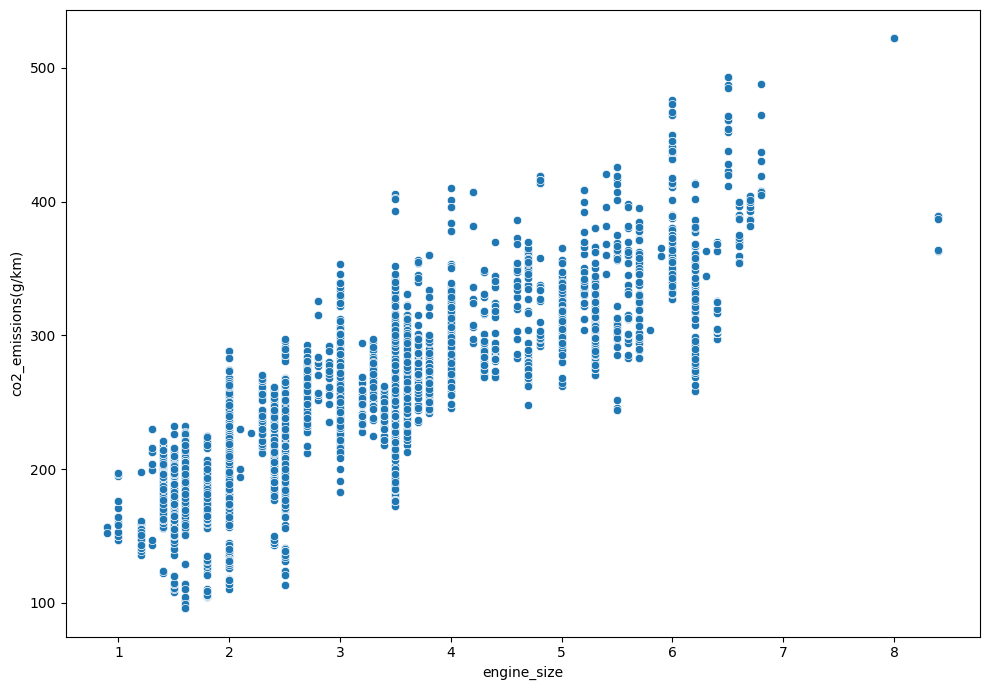

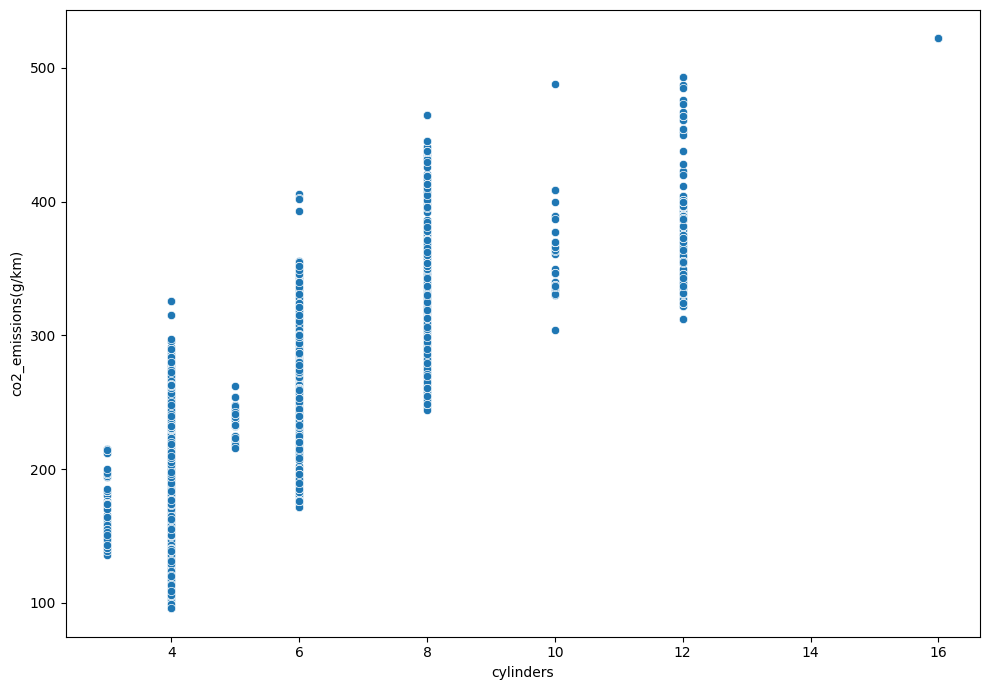

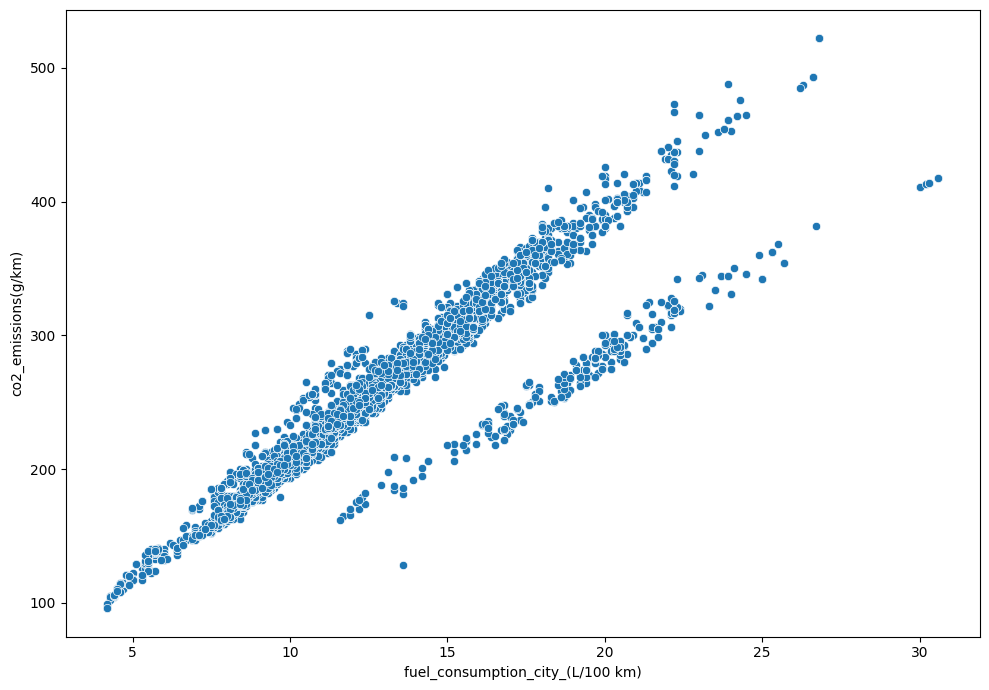

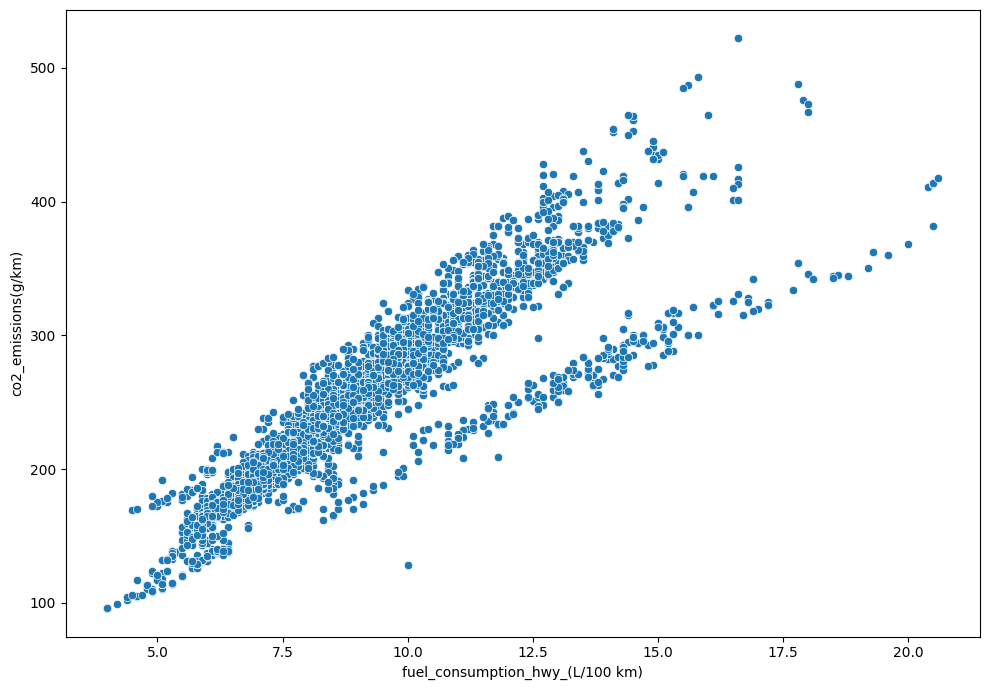

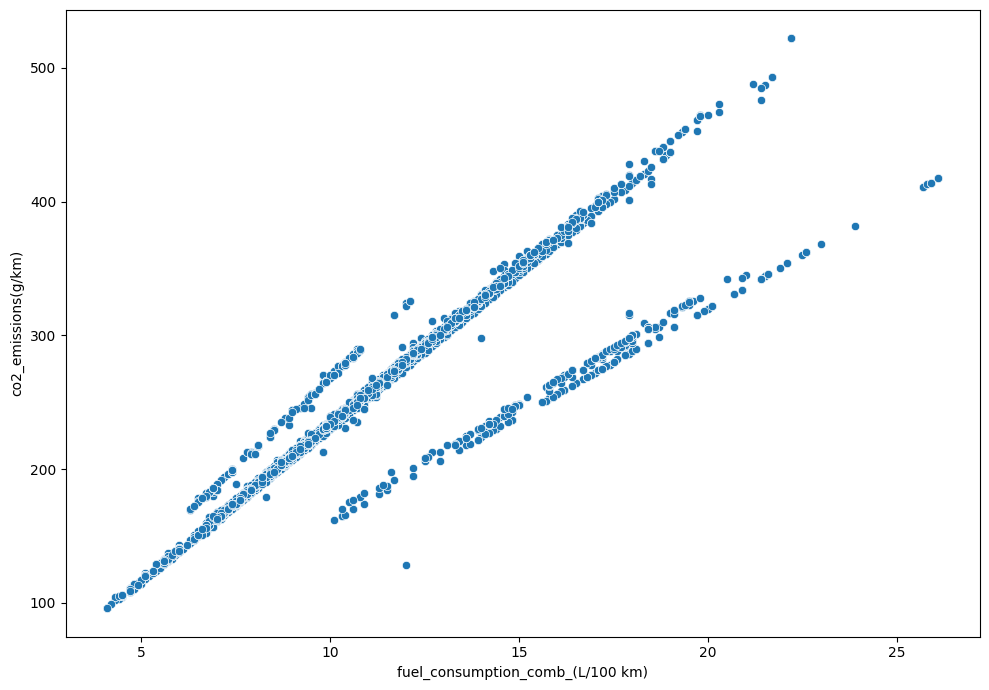

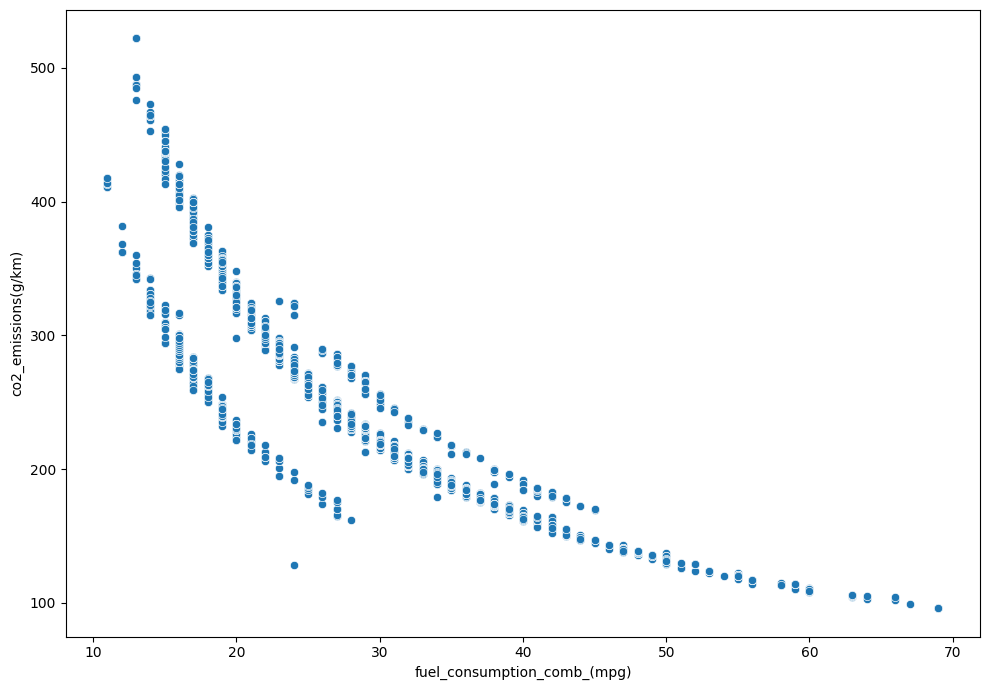

In [30]:
#Visualizing Using SCATTER_PLOT for each Independent_Quantitative_Variables with Dependent_Variable (Target_Variable).

transport_df_IQV_TO_DV = transport_df_quantitative.drop(['co2_emissions(g/km)'], axis=1)

for i in transport_df_IQV_TO_DV.columns:
    plt.figure(figsize=(10,7))
    sns.scatterplot(data=transport_df, x=i, y='co2_emissions(g/km)')
    plt.tight_layout()

In [31]:
#Finding correlation of the quatitative data with respect to the target_data[co2_emissions(g/km)]
correlation_matrix = transport_df_quantitative.corr()
target_correlation = correlation_matrix['co2_emissions(g/km)'].abs().sort_values(ascending=False)
target_correlation

co2_emissions(g/km)                 1.000000
fuel_consumption_city_(L/100 km)    0.919592
fuel_consumption_comb_(L/100 km)    0.918052
fuel_consumption_comb_(mpg)         0.907426
fuel_consumption_hwy_(L/100 km)     0.883536
engine_size                         0.851145
cylinders                           0.832644
Name: co2_emissions(g/km), dtype: float64

<Axes: >

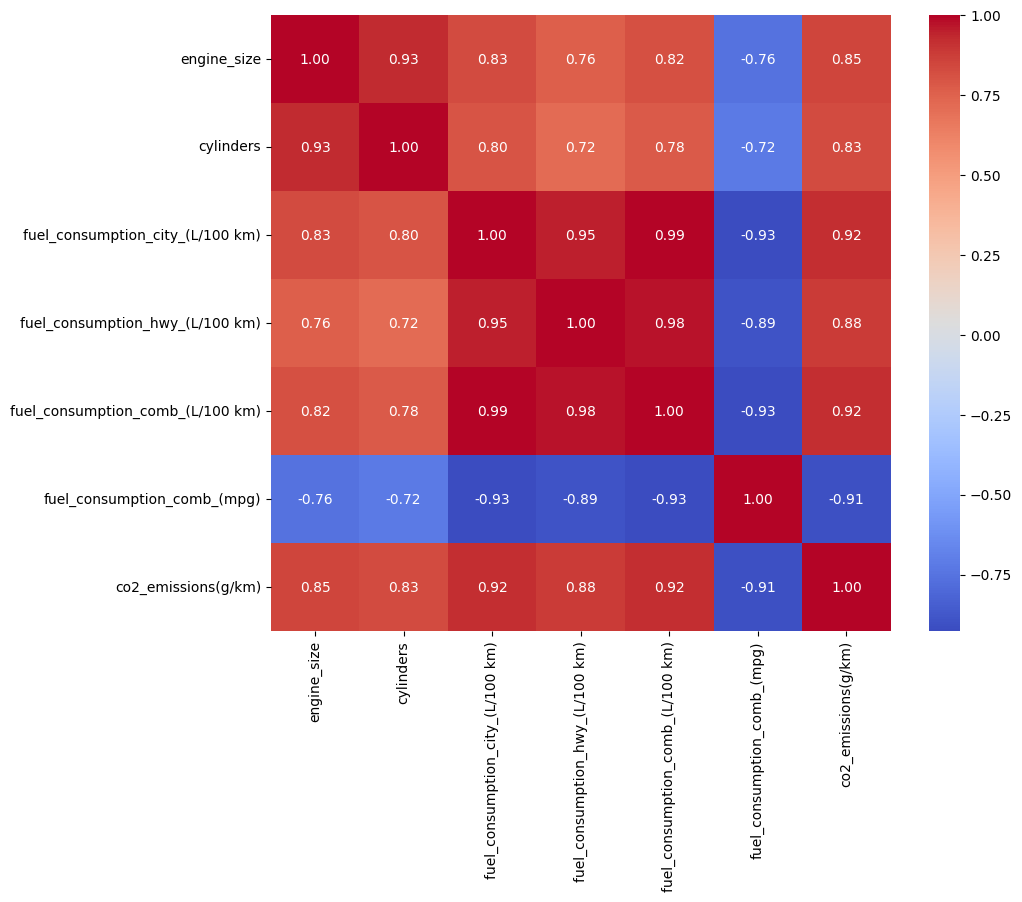

In [32]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder()

# # Fit and transform the categorical variable
# encoded_data = encoder.fit_transform(df[['vehicle_class']])

# # Convert the encoded data into a DataFrame
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['vehicle_class']))

# # Concatenate the original DataFrame with the encoded DataFrame
# df_encoded = pd.concat([df, encoded_df], axis=1)
# # df_encoded = df_encoded[df_encoded['fuel_type'] != 'N']
# # df_encoded.drop('fuel_type_N', axis=1, inplace=True)
# df_encoded.drop('vehicle_class', axis=1, inplace=True)
# df_encoded

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [38]:
# Quantitative 1 Variable Regression Analysis
for i in transport_df_IQV_TO_DV.columns:
    X = transport_df_IQV_TO_DV[[i]]
    y = transport_df_quantitative['co2_emissions(g/km)']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()
    
    # Train the model using the training sets
    model.fit(X_train, y_train)
    
    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Model evaluation
    print('Mean squared error ' + i + ' : ', mean_squared_error(y_test, y_pred))
    print('Coefficient of determination (R^2) ' + i + ' :', r2_score(y_test, y_pred))
    print()

Mean squared error engine_size :  949.9852533375365
Coefficient of determination (R^2) engine_size : 0.7238115822302342

Mean squared error cylinders :  1077.7356329705221
Coefficient of determination (R^2) cylinders : 0.6866708212590902

Mean squared error fuel_consumption_city_(L/100 km) :  543.7894776751609
Coefficient of determination (R^2) fuel_consumption_city_(L/100 km) : 0.8419045401901759

Mean squared error fuel_consumption_hwy_(L/100 km) :  748.0679568713396
Coefficient of determination (R^2) fuel_consumption_hwy_(L/100 km) : 0.782514828870562

Mean squared error fuel_consumption_comb_(L/100 km) :  549.5829478048796
Coefficient of determination (R^2) fuel_consumption_comb_(L/100 km) : 0.8402202094672495

Mean squared error fuel_consumption_comb_(mpg) :  629.4127300202429
Coefficient of determination (R^2) fuel_consumption_comb_(mpg) : 0.8170113636841115



In [39]:
# Quantitative 2 Variable Regression Analysis
for i in transport_df_IQV_TO_DV.columns:
    X = transport_df_IQV_TO_DV[[i, 'fuel_consumption_city_(L/100 km)']]
    y = transport_df_quantitative['co2_emissions(g/km)']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()
    
    # Train the model using the training sets
    model.fit(X_train, y_train)
    
    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Model evaluation
    print('Mean squared error ' + i + ' : ', mean_squared_error(y_test, y_pred))
    print('Coefficient of determination (R^2) ' + i + ' :', r2_score(y_test, y_pred))
    print()

Mean squared error engine_size :  454.44107955122445
Coefficient of determination (R^2) engine_size : 0.8678807252113819

Mean squared error cylinders :  448.73184985310263
Coefficient of determination (R^2) cylinders : 0.8695405647841212

Mean squared error fuel_consumption_city_(L/100 km) :  543.8142976605723
Coefficient of determination (R^2) fuel_consumption_city_(L/100 km) : 0.8418973242965863

Mean squared error fuel_consumption_hwy_(L/100 km) :  537.7604835322658
Coefficient of determination (R^2) fuel_consumption_hwy_(L/100 km) : 0.8436573446123702

Mean squared error fuel_consumption_comb_(L/100 km) :  537.6339448253827
Coefficient of determination (R^2) fuel_consumption_comb_(L/100 km) : 0.8436941331047366

Mean squared error fuel_consumption_comb_(mpg) :  473.968663479008
Coefficient of determination (R^2) fuel_consumption_comb_(mpg) : 0.8622034870764395



In [78]:
X = transport_df_IQV_TO_DV
y = transport_df_quantitative['co2_emissions(g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Model evaluation
print('Mean squared error ' + i + ' : ', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2) ' + i + ' :', r2_score(y_test, y_pred))
print()

print(model.coef_)

Mean squared error fuel_consumption_comb_(mpg) :  337.4608996974323
Coefficient of determination (R^2) fuel_consumption_comb_(mpg) : 0.9018902750130587

[ 4.96114017  7.49217904  1.0118255   5.10954011 -0.0368259  -3.4487323 ]


In [41]:
# Quantitative except 1 Variable Regression Analysis
for i in transport_df_IQV_TO_DV.columns:
    X = transport_df_IQV_TO_DV.drop([i], axis=1)
    y = transport_df_quantitative['co2_emissions(g/km)']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()
    
    # Train the model using the training sets
    model.fit(X_train, y_train)
    
    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Model evaluation
    print('Mean squared error ' + i + ' : ', mean_squared_error(y_test, y_pred))
    print('Coefficient of determination (R^2) ' + i + ' :', r2_score(y_test, y_pred))
    print()

Mean squared error engine_size :  342.8330354018885
Coefficient of determination (R^2) engine_size : 0.9003284384950228

Mean squared error cylinders :  362.6765354445854
Coefficient of determination (R^2) cylinders : 0.8945593543323452

Mean squared error fuel_consumption_city_(L/100 km) :  337.40413342653375
Coefficient of determination (R^2) fuel_consumption_city_(L/100 km) : 0.9019067786234959

Mean squared error fuel_consumption_hwy_(L/100 km) :  337.40490585647296
Coefficient of determination (R^2) fuel_consumption_hwy_(L/100 km) : 0.9019065540555861

Mean squared error fuel_consumption_comb_(L/100 km) :  337.4597605023133
Coefficient of determination (R^2) fuel_consumption_comb_(L/100 km) : 0.9018906062103024

Mean squared error fuel_consumption_comb_(mpg) :  421.86390221589033
Coefficient of determination (R^2) fuel_consumption_comb_(mpg) : 0.8773518607180024



In [62]:
# Quantitative except 2 Variable Regression Analysis

X = transport_df_IQV_TO_DV.drop(['engine_size', 'cylinders'], axis=1)
y = transport_df_quantitative['co2_emissions(g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Model evaluation
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2):', r2_score(y_test, y_pred))
print()

Mean squared error:  342.7668802642345
Coefficient of determination (R^2): 0.9003476717228353



In [79]:
# Splitting the data into training and testing sets
X = sm.add_constant(transport_df_IQV_TO_DV)
y = transport_df_quantitative['co2_emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     co2_emissions(g/km)   R-squared:                       0.904
Model:                             OLS   Adj. R-squared:                  0.904
Method:                  Least Squares   F-statistic:                 1.157e+04
Date:                 Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                         21:34:23   Log-Likelihood:                -31880.
No. Observations:                 7385   AIC:                         6.377e+04
Df Residuals:                     7378   BIC:                         6.382e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              227.8928      4.200     54.255      0.000     219.659     236.127
engine_size                          4.9936      0.456     10.962      0.000       4.101       5.887
cylinders                            7.5385      0.319     23.657      0.000       6.914       8.163
fuel_consumption_city_(L/100 km)    -0.0238      2.738     -0.009      0.993      -5.391       5.344
fuel_consumption_hwy_(L/100 km)      4.4906      2.260      1.987      0.047       0.061       8.920
fuel_consumption_comb_(L/100 km)     1.6730      4.969      0.337      0.736      -8.069      11.415
fuel_consumption_comb_(mpg)         -3.4235      0.079    -43.545      0.000      -3.578      -3.269
==============================================================================
Omnibus:                     1193.702   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7810.498
Skew:                          -0.609   Prob(JB):                         0.00
Kurtosis:                       7.889   Cond. No.                         987.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Define the range of x values for plotting
x = np.linspace(df_encoded['fuel_consumption_comb_(L/100 km)'].min(),
                df_encoded['fuel_consumption_comb_(L/100 km)'].max(), 100)

# Extract coefficients
coef = model.params

# Define equations for each fuel type
y1 = (coef['fuel_consumption_comb_(L/100 km)'] * x) + coef['const'] + coef['fuel_type_E']
y2 = (coef['fuel_consumption_comb_(L/100 km)'] * x) + coef['const'] + coef['fuel_type_X']
y3 = (coef['fuel_consumption_comb_(L/100 km)'] * x) + coef['const'] + coef['fuel_type_Z']
y4 = (coef['fuel_consumption_comb_(L/100 km)'] * x) + coef['const'] + coef['fuel_type_D']

# Plot the equations
plt.figure(figsize=(10, 6))

plt.plot(x, y1, label='Fuel Type E')
plt.plot(x, y2, label='Fuel Type X')
plt.plot(x, y3, label='Fuel Type Z')
plt.plot(x, y4, label='Fuel Type D')

plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Regression Equations for Each Fuel Type')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# # Extract p-values for each feature
# p_values = model.pvalues
# p_values

# for feature, p_value in p_values.items():
#     print(f"P-value of {feature}: {p_value:.5f}")

# # # Print the p-value for a specific feature (e.g., 'fuel_consumption_comb_(L/100 km)')
# # print("P-value for 'fuel_consumption_comb_(L/100 km)':", p_values['fuel_consumption_comb_(L/100 km)'])

In [ ]:
# # Qualitative variable visualization analysis using Countplot and Barplot.

# # Visualizing Using COUNT PLOT
# for i in transport_df_qualitative.columns:
#     plt.figure(figsize=(10,7))
#     count_plt = sns.countplot(data=transport_df_qualitative, x=i)
#     count_plt.set(title=i.upper() + " Count Plot")
#     count_plt.tick_params(axis='x', rotation=90)
#     plt.tight_layout()

# # Test the Bar plot values

# #new_df = car_price_df.query('Fuel_type == "Petrol"')
# new_df = transport_df[transport_df['make'] == 'FORD']
# new_df['co2_emissions(g/km)'].mean()

# # Visualizing Using BAR PLOT (x -> categorical, y -> quantitative)
# for i in transport_df_qualitative.columns:
#     plt.figure(figsize=(15,7))
#     bar_plot = sns.barplot(data=transport_df, x=i, y='co2_emissions(g/km)')
#     bar_plot.set(title=i.upper() + " Bar Plot")
#     bar_plot.tick_params(axis='x', rotation=90)
#     plt.tight_layout()

# #Finding correlation of the quatitative data with respect to the target_data[co2_emissions(g/km)]
# correlation_matrix = transport_df_quantitative.corr()
# target_correlation = correlation_matrix['co2_emissions(g/km)'].abs().sort_values(ascending=False)
# target_correlation

# # Heatmap for correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# #Visualizing Using HISTOGRAM.
# for i in transport_df_quantitative.columns:
#     plt.figure(figsize=(10,7))
#     sns.histplot(data=transport_df_quantitative, x=i, kde=True)

# #Visualizing Using BOX_PLOT.
# for i in transport_df_quantitative.columns:
#     plt.figure(figsize=(10,7))
#     sns.boxplot(data=transport_df_quantitative, y=i)
#     plt.tight_layout()

# #Removing outliers

# filtered_transport_df = transport_df.copy()

# for i in transport_df_quantitative.columns:
    
#     # Step 1: Calculate the Interquartile Range (IQR)
#     Q1 = transport_df[i].quantile(0.25)
#     Q3 = transport_df[i].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Step 2: Define the lower and upper bounds to identify outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Step 3: Filter out the outliers from the DataFrame
#     filtered_transport_df = filtered_transport_df[(filtered_transport_df[i] >= lower_bound) & (filtered_transport_df[i] <= upper_bound)]

# # Splitting the data into training and testing sets
# X = sm.add_constant(df_encoded.drop(['co2_emissions(g/km)'], axis=1))
# y = df_encoded['co2_emissions(g/km)']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Creating and training the model
# model = sm.OLS(y, X).fit()

# model.summary()